In [1]:
# ! pip install pandas

# Домашнее задание по библиотеке Pandas

## 📝 Описание данных


**Таблица Pays** (файл pays.csv) содержит данные о платежах между компаниями:

| **Название признака**         | **Описание** |
|------------------|-------------|
| *hash_inn_kt*   | Обезличенный ИНН отправителя |
| *hash_inn_dt*   | Обезличенный ИНН получателя |
| *week*          | Неделя |
| *count*         | Кол-во платежей в неделю |
| *sum*           | Сумма платежей в неделю (обезличенная) |


**Таблица inn_info_public** (файл inn_info_public.csv) содержит характеристики отдельных компаний:  

| **Название признака**         | **Описание** |
|------------------|-------------|
| *hash_inn*      | Обезличенный ИНН |
| *okved2*        | Обезличенная отрасль (ОКВЭД)|
| *region*        | Обезличенный регион |
| *is_public*     | Флаг публичной компании (True, если да) |

## 💫 Приступаем к работе

Теперь можно начинать! Импорт библиотеки pandas уже записан, для выполнения заданий достаточно только её, ~но если Вам захочется импортировать что-то ещё - это не возбраняется:)~.

Далее прочитайте файл удобным способом и выполняйте задания по порядку, код можно писать непосредственно сразу после условия задач, в отведённых под это ячейках.

*Совет (особенно для последних заданий): первым делом вдумайтесь в условие и прикиньте схему решения - какие таблицы Вам понадобятся, нужно ли что-то сгруппировать/объединить, по каким полям и с какими агрегирующими функциями... И только после этого приступайте к реализации задуманного на Python.*



In [2]:
import pandas as pd
import numpy as np

In [3]:
pays_data = pd.read_csv('../TestData/pays.csv')
inn_info_public = pd.read_csv('../TestData/inn_info_public.csv')

### Задание 1

Выведите размерность (количество строк и столбцов) и первые 3 строки для каждой таблицы.

In [4]:
print(pays_data.shape)
pays_data.head(3)

(5430150, 5)


,hash_inn_kt,hash_inn_dt,week,count,sum
0,0,0,1,4,38399.6
1,0,0,5,2,399.6
2,0,0,7,2,79.6


In [5]:
print(inn_info_public.shape)
inn_info_public.head(3)

(240069, 4)


,hash_inn,okved2,region,is_public
0,61058,34,86,True
1,8311,18,86,True
2,130273,-1,86,False


### Задание 2
Посчитайте количество пропусков в каждой таблице по столбцам.

In [6]:
# pays_data.info()
pays_data.isnull().sum()

hash_inn_kt       0
hash_inn_dt       0
week              0
count             0
sum            1125
dtype: int64

In [7]:
# inn_info_public.info()
inn_info_public.isnull().sum()

hash_inn     0
okved2       0
region       0
is_public    0
dtype: int64

### Задание 3
Определите количество уникальных компаний в таблице **pays** (как отправителей, так и получателей).

In [8]:
print(len(set(pays_data['hash_inn_kt']) | set(pays_data['hash_inn_dt'])))
print(pd.concat([pays_data['hash_inn_kt'], pays_data['hash_inn_dt']]).nunique())

240071
240071


### Задание 4

Найдите сумму и среднее количество платежей по неделям.

In [9]:
pays_data.groupby('week')['count'].agg(
    total_count='sum',
    avg_count='mean'
)

,total_count,avg_count
week,,
0,7232,3.111876
1,707513,2.963132
2,697729,2.885157
3,698557,2.884061
4,702679,2.844992
5,705049,2.891892
6,718498,2.941530
7,475101,2.707992
8,814890,2.962353


### Задание 5

Определите 5 компаний (по `hash_inn_kt`), которые отправили наибольшую сумму платежей за весь период.

In [10]:
pays_data.groupby('hash_inn_kt')['count'].sum().sort_values().tail(5)

hash_inn_kt
111553     58625
92978      61069
254311     69503
177448    177969
33988     230374
Name: count, dtype: int64

### Задание 6

По данным таблицы **inn_info_public** исследуйте распределение ОКВЭДов (подсчитайте для каждого типа ОКВЭДа сколько компаний из таблицы к нему относятся). Визуализируйте распределение *(поможет метод `hist`)*.

Text(0, 0.5, 'Количество компаний в ОКВЭДе')

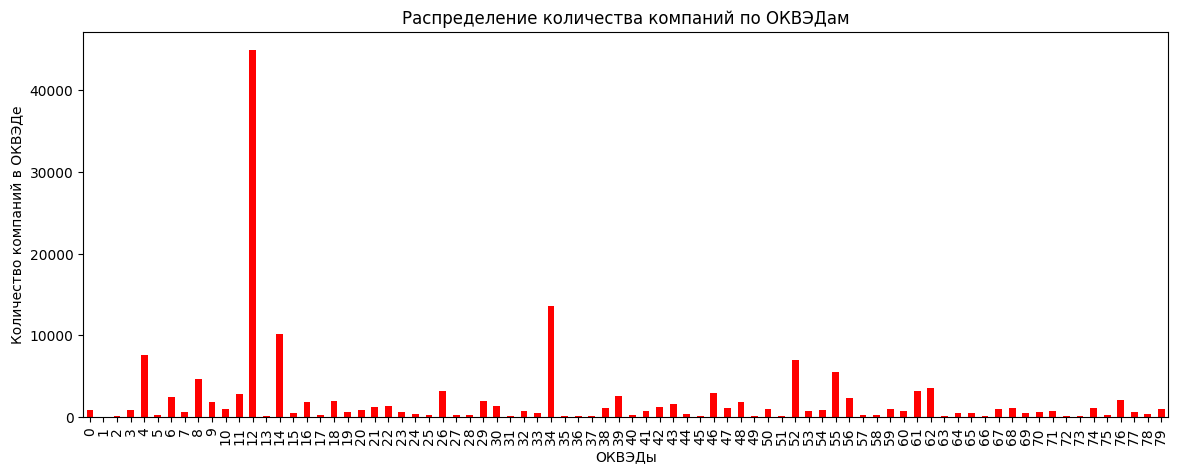

In [11]:
okved_counts = inn_info_public[inn_info_public['okved2'] != -1].groupby('okved2')['hash_inn'].count()
ax = okved_counts.plot(kind='bar', title='Распределение количества компаний по ОКВЭДам', color='r', figsize=(14,5))
ax.set_xlabel('ОКВЭДы')
ax.set_ylabel('Количество компаний в ОКВЭДе')

<Axes: title={'center': 'Распределение количества компаний по ОКВЭДам'}, ylabel='Frequency'>

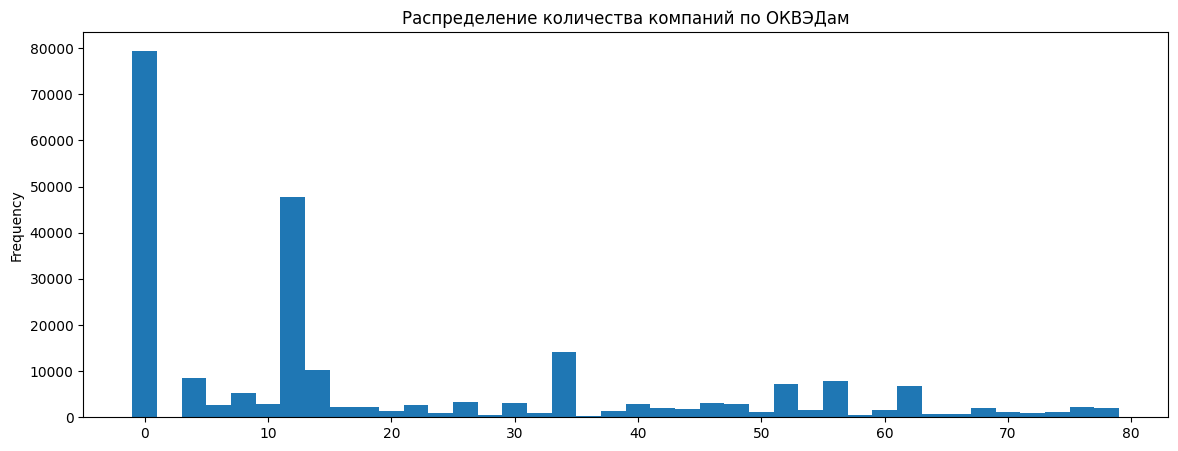

In [12]:
inn_info_public['okved2'].plot(kind='hist', bins=40, title='Распределение количества компаний по ОКВЭДам', figsize=(14,5))

### Задание 7

Добавьте в таблицу Pays информацию об ОКВЭДе и регионе отправителя (`hash_inn_kt`) и получателя (`hash_inn_dt`).

*Подсказка: здесь нужно поработать с двумя таблицами одновременно*

In [36]:
kt_merged = pd.merge(pays_data, inn_info_public[['hash_inn', 'okved2', 'region']], left_on=['hash_inn_kt'], right_on=['hash_inn'], how='left')
kt_merged = kt_merged.rename(columns={
    'okved2': 'ОКВЭД отправителя',
    'region': 'Регион отправителя'
})
kt_merged.drop('hash_inn', axis=1, inplace=True)
# kt_merged.sample(10)

kt_dt_merged = pd.merge(kt_merged, inn_info_public[['hash_inn', 'okved2', 'region']], left_on=['hash_inn_dt'], right_on=['hash_inn'], how='left')
kt_dt_merged = kt_dt_merged.rename(columns={
    'okved2': 'ОКВЭД получателя',
    'region': 'Регион получателя'
})
kt_dt_merged.drop('hash_inn', axis=1, inplace=True)
kt_dt_merged.head(20)

,hash_inn_kt,hash_inn_dt,week,count,sum,ОКВЭД отправителя,Регион отправителя,ОКВЭД получателя,Регион получателя
0,0,0,1,4,38399.600,-1,84,-1.0,84.0
1,0,0,5,2,399.600,-1,84,-1.0,84.0
2,0,0,7,2,79.600,-1,84,-1.0,84.0
3,0,0,9,2,239.600,-1,84,-1.0,84.0
4,0,0,12,2,79.600,-1,84,-1.0,84.0
5,0,0,15,2,399.600,-1,84,-1.0,84.0
6,0,0,16,2,0.920,-1,84,-1.0,84.0
7,0,0,20,4,2399.600,-1,84,-1.0,84.0
8,0,0,21,4,0.800,-1,84,-1.0,84.0
9,0,0,22,2,239.600,-1,84,-1.0,84.0


### Задание 8


Используя результат, полученный в предыдущем задании, создайте таблицу, в которой для каждой отрасли (ОКВЭДа) указана сумма платежей, отправленных компаниями из этой отрасли.

In [33]:
kt_dt_merged.groupby('ОКВЭД отправителя')['sum'].sum()

ОКВЭД отправителя
-1     6.768533e+08
 0     2.674689e+06
 1     4.062196e+04
 2     3.806638e+07
 3     5.605054e+05
           ...     
 75    1.951670e+06
 76    2.829748e+07
 77    4.633386e+05
 78    9.893692e+06
 79    4.406375e+06
Name: sum, Length: 81, dtype: float64

### Задание 9
Определите, какую долю от общего объема составляют платежи, где отправитель и получатель находятся в разных регионах.

In [39]:
different_regions = kt_dt_merged[kt_dt_merged['Регион отправителя'] != kt_dt_merged['Регион получателя']]
different_regions.head(5)

,hash_inn_kt,hash_inn_dt,week,count,sum,ОКВЭД отправителя,Регион отправителя,ОКВЭД получателя,Регион получателя
18,0,25395,6,3,100.080,-1,84,52.0,60.0
19,0,34686,10,1,483.872,-1,84,-1.0,58.0
20,0,34686,11,4,989.744,-1,84,-1.0,58.0
21,0,41812,8,3,107.600,-1,84,55.0,57.0
22,0,47950,4,1,299.692,-1,84,61.0,7.0


In [44]:
print('Доля платежей, где отправитель и получатель находятся в разных регионах:', different_regions.shape[0] / kt_dt_merged.shape[0])

Доля платежей, где отправитель и получатель находятся в разных регионах: 0.4548784103569883


### Задание 10
Определите среднюю сумму платежей для публичных (`is_public == 1`) и непубличных компаний (`is_public == 0`).

In [78]:
inn_merged = pd.merge(inn_info_public, pays_data, left_on=['hash_inn'], right_on=['hash_inn_kt'], how='left')
inn_merged['sum'] = inn_merged['sum'].replace(np.nan, 0)
inn_merged.sample(30)

,hash_inn,okved2,region,is_public,hash_inn_kt,hash_inn_dt,week,count,sum
5304335,66365,76,58,True,66365.0,58050.0,21.0,4.0,5.024
1919837,90166,3,26,True,90166.0,129500.0,14.0,1.0,2.240
2329089,199051,12,84,True,199051.0,75205.0,9.0,2.0,4.472
3766098,139059,12,77,True,139059.0,151408.0,20.0,1.0,118.036
1388908,148881,12,84,True,148881.0,124650.0,4.0,4.0,28.412
3284096,178574,-1,60,False,178574.0,152960.0,15.0,2.0,86.260
4600201,115306,12,85,True,115306.0,81057.0,4.0,1.0,-0.180
776702,92055,-1,87,False,92055.0,125005.0,7.0,1.0,6.072
1026248,29278,-1,84,False,29278.0,224062.0,15.0,2.0,8.984
4044762,123944,14,85,True,123944.0,144362.0,3.0,1.0,35.840


In [79]:
inn_merged.groupby('is_public')['sum'].mean()

is_public
False    388.920828
True     386.968446
Name: sum, dtype: float64

### Задание * (по желанию и возможностям)

Если у Вас есть свои наблюдения, дополните анализ данных.

In [70]:
df = pd.DataFrame({'A': [1, 1, 2, 1, 2], 'B': [np.nan, 2, 3, 4, 5], 'C': [np.nan, np.nan, 1, 2, 3]}, columns=['A', 'B', 'C'])
df.head(3)

,A,B,C
0,1,NaN,NaN
1,1,2.0,NaN
2,2,3.0,1.0


In [71]:
df['B'] = df['B'].replace(np.nan, 0)
df.head(3)

,A,B,C
0,1,0.0,NaN
1,1,2.0,NaN
2,2,3.0,1.0


In [72]:
df.groupby('A').mean()

,B,C
A,,
1,2.0,2.0
2,4.0,2.0
